In [84]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

import sys
sys.path.insert(0, '../titanic/')
import load_titanic_data

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,\
    classification_report, confusion_matrix

from mlxtend.plotting import plot_decision_regions



In [85]:
def knn_comparison(X, y, k):
    
    clf = KNeighborsClassifier(n_neighbors=k, weights='distance')
    clf.fit(X, y)
    plot_decision_regions(X, y, clf=clf, legend=2)
    plt.xlabel("Features")
    plt.ylabel("Labels")
    plt.title("KNN with K "+ str(k))
    plt.show();

In [86]:
def knn_comparison2(X, y, k):
    
    clf = KNeighborsClassifier(n_neighbors=k, weights='distance')
    clf.fit(X, y)
    plot_decision_regions(X, y, clf=clf, legend=2)
    plt.xlabel("Parch")
    plt.ylabel("Fare")
    plt.title("KNN with K "+ str(k))
    plt.show();

In [87]:
train = pd.read_csv('../titanic/cleaned_train.csv')

In [88]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [89]:
data = train.values

# VISUALISATION

In [90]:
y = data[:, :1]
X = data[:, 1:]
X2 = data[:, 4:6]
X3 = data[:, 1:7]

In [91]:
y = y.astype(np.integer)
y = y.ravel()

In [92]:
pca = PCA(n_components = 2)
X = pca.fit_transform(X)
X3 = pca.fit_transform(X3)

In [93]:
y.shape

(889,)

In [94]:
X.shape

(889, 2)

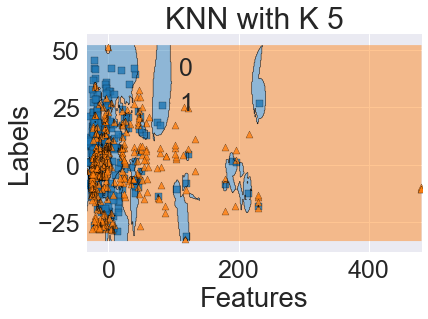

In [95]:
knn_comparison(X, y, 5)

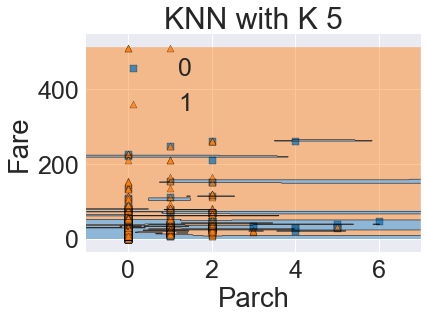

In [96]:
knn_comparison2(X2, y, 5)

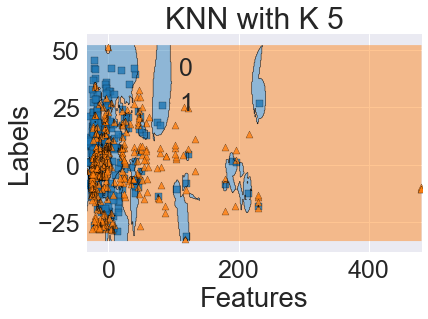

In [97]:
knn_comparison(X3, y, 5)

# Data Manipulation

In [98]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [99]:
features = train.drop('Survived',axis=1)
features.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [100]:
labels = train['Survived']
labels.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [101]:
# split data into training and validation set
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, random_state = 42, test_size = 0.1)

# Data Manipulation 2

In [102]:
features2 = train.drop(['Survived','Q', 'S'],axis=1)
features2.head()

,Pclass,Age,SibSp,Parch,Fare,male
0,3,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,0
2,3,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,0
4,3,35.0,0,0,8.0500,1


In [103]:
# split data into training and validation set
train_features2, test_features2, train_labels2, test_labels2 = train_test_split(
    features2, labels, random_state = 42, test_size = 0.1)

# Default Model weights="uniform", n_neighbors=5

In [104]:
knn_model = KNeighborsClassifier()

In [105]:
knn_model = knn_model.fit(train_features, train_labels)

In [106]:
predictions = knn_model.predict(test_features)

In [107]:
print(accuracy_score(test_labels,predictions))

0.6853932584269663


# k_neighbors=10, remainder default

In [108]:
knn_model2 = KNeighborsClassifier(n_neighbors=10)

In [109]:
knn_model2 = knn_model2.fit(train_features, train_labels)

In [110]:
predictions = knn_model2.predict(test_features)

In [111]:
print(accuracy_score(test_labels,predictions))

0.7078651685393258


# weights='distance', remainder default

In [112]:
knn_model3 = KNeighborsClassifier(weights='distance')

In [113]:
knn_model3 = knn_model3.fit(train_features, train_labels)

In [114]:
predictions = knn_model3.predict(test_features)

In [115]:
print(accuracy_score(test_labels, predictions))

0.7303370786516854


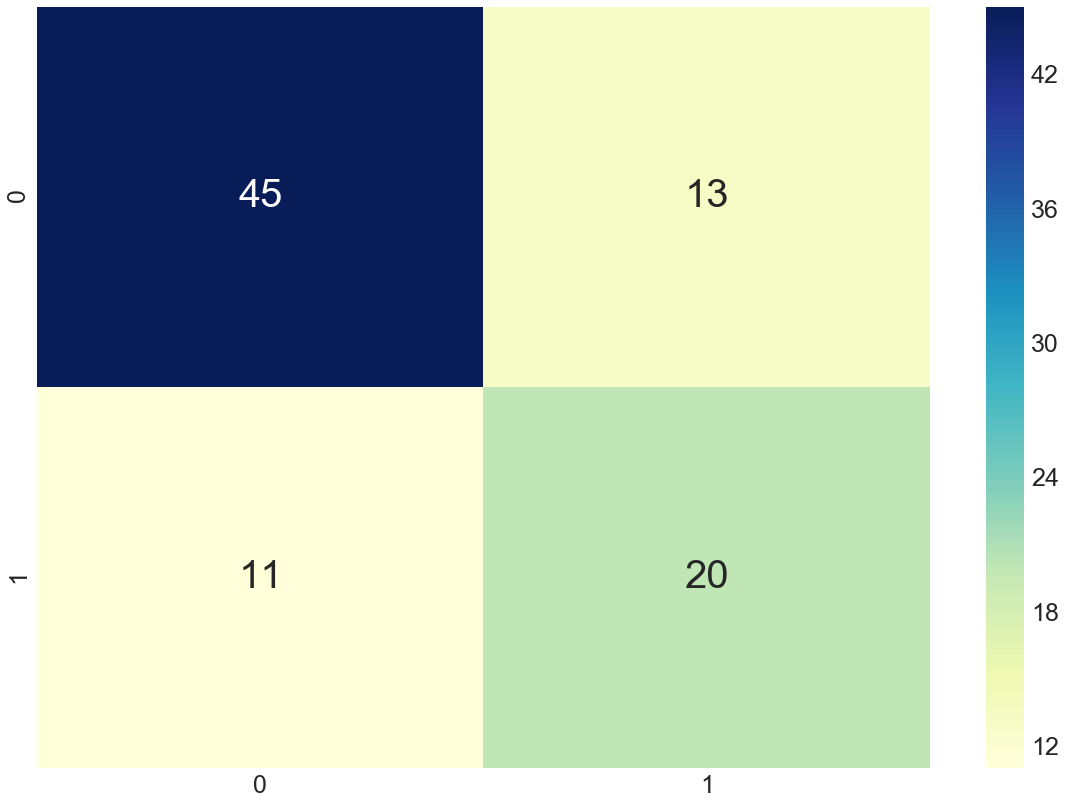

In [116]:
cm = confusion_matrix(test_labels, predictions)

cm_df = pd.DataFrame(cm, index = {i for i in test_labels}, 
                             columns = {i for i in test_labels})
plt.figure(figsize = (20,14))
sns.set(font_scale = 2.5)
sns.heatmap(cm_df, annot=True, annot_kws = {"size":40}, cmap="YlGnBu")
        
plt.show()

In [117]:
print("Here is the classification report of the KNN Model")
print(classification_report(test_labels, predictions, target_names = ["Did Not Survive", "Survived"]))

Here is the classification report of the KNN Model
                 precision    recall  f1-score   support

Did Not Survive       0.80      0.78      0.79        58
       Survived       0.61      0.65      0.62        31

       accuracy                           0.73        89
      macro avg       0.70      0.71      0.71        89
   weighted avg       0.73      0.73      0.73        89



# weights='distance', remainder default - Dropped 'Q', 'S'

In [118]:
knn_model10 = KNeighborsClassifier(weights='distance')

In [119]:
knn_model10 = knn_model10.fit(train_features2, train_labels2)

In [120]:
predictions = knn_model10.predict(test_features2)

In [121]:
print(accuracy_score(test_labels2, predictions))

0.7415730337078652


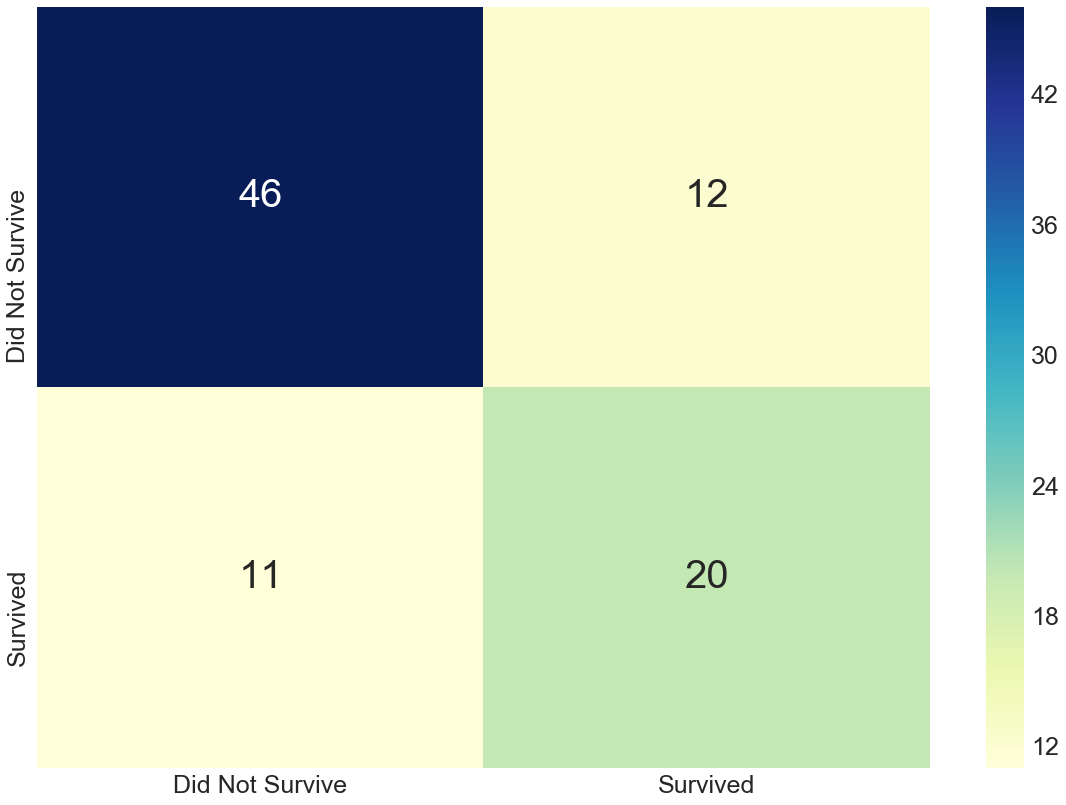

In [122]:
cm = confusion_matrix(test_labels2, predictions)

cm_df = pd.DataFrame(cm, index = ["Did Not Survive", "Survived"], 
                             columns = ["Did Not Survive", "Survived"])
plt.figure(figsize = (20,14))
sns.set(font_scale = 2.5)
sns.heatmap(cm_df, annot=True, annot_kws = {"size":40}, cmap="YlGnBu")
        
plt.show()

In [123]:
print("Here is the classification report of the KNN Model")
print(classification_report(test_labels, predictions, target_names = ["Did Not Survive", "Survived"]))

Here is the classification report of the KNN Model
                 precision    recall  f1-score   support

Did Not Survive       0.81      0.79      0.80        58
       Survived       0.62      0.65      0.63        31

       accuracy                           0.74        89
      macro avg       0.72      0.72      0.72        89
   weighted avg       0.74      0.74      0.74        89



In [124]:
test_data = pd.read_csv("../titanic/cleaned_test.csv")

In [125]:
features = test_data.drop(['PassengerId', 'Q', 'S'],axis=1)
features.head()

,Pclass,Age,SibSp,Parch,Fare,male
0,3,34.5,0,0,7.8292,1
1,3,47.0,1,0,7.0000,0
2,2,62.0,0,0,9.6875,1
3,3,27.0,0,0,8.6625,1
4,3,22.0,1,1,12.2875,0


In [126]:
predict = knn_model10.predict(features)

In [127]:
predict_df = pd.DataFrame(data = predict, columns = ["Survived"])
id_col = test_data[["PassengerId"]]
submission = pd.concat([id_col,predict_df], axis = 1)
submission.astype("int32")
submission.to_csv("../submissions/KNN_Submission3.csv", index=False)

# weights='distance', algorithm='ball_tree', remainder default

In [128]:
knn_model4 = KNeighborsClassifier(weights='distance', algorithm='ball_tree')

In [129]:
knn_model4 = knn_model4.fit(train_features, train_labels)

In [130]:
predictions = knn_model4.predict(test_features)

In [131]:
print(accuracy_score(test_labels, predictions))

0.7303370786516854


# algorithm="ball_tree", reaminder default 

In [132]:
knn_model5 = KNeighborsClassifier(algorithm='ball_tree')

In [133]:
knn_model5 = knn_model5.fit(train_features, train_labels)

In [134]:
predictions = knn_model5.predict(test_features)

In [135]:
print(accuracy_score(test_labels, predictions))

0.6853932584269663


# weight='distance', p=1, remainder default

In [136]:
knn_model6 = KNeighborsClassifier(weights='distance', p=1)

In [137]:
knn_model6 = knn_model6.fit(train_features, train_labels)

In [138]:
predictions = knn_model6.predict(test_features)

In [139]:
print(accuracy_score(test_labels, predictions))

0.7191011235955056


# weights='distance', algorithm='kd_tree', remainder default

In [140]:
knn_model7 = KNeighborsClassifier(weights='distance', algorithm='kd_tree')

In [141]:
knn_model7 = knn_model7.fit(train_features, train_labels)

In [142]:
predictions = knn_model7.predict(test_features)

In [143]:
print(accuracy_score(test_labels, predictions))

0.7303370786516854


# weight='distance', algorithm='kd_tree', p=1, remainder default

In [144]:
knn_model8 = KNeighborsClassifier(weights='distance', algorithm='kd_tree', p=1)

In [145]:
knn_model8 = knn_model8.fit(train_features, train_labels)

In [146]:
predictions = knn_model8.predict(test_features)

In [147]:
print(accuracy_score(test_labels, predictions))

0.7191011235955056


# weight='distance', n_neighbors=10, remainder default

In [148]:
knn_model9 = KNeighborsClassifier(weights='distance', algorithm='kd_tree', p=1)

In [149]:
knn_model9 = knn_model9.fit(train_features, train_labels)

In [150]:
predictions = knn_model9.predict(test_features)

In [151]:
print(accuracy_score(test_labels, predictions))

0.7191011235955056
